/Users/antonlenander/anaconda3/envs/phantom/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-05 17:26:17,138	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-05 17:26:17,342	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-05 17:26:17,793	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


Loading production data...
8760


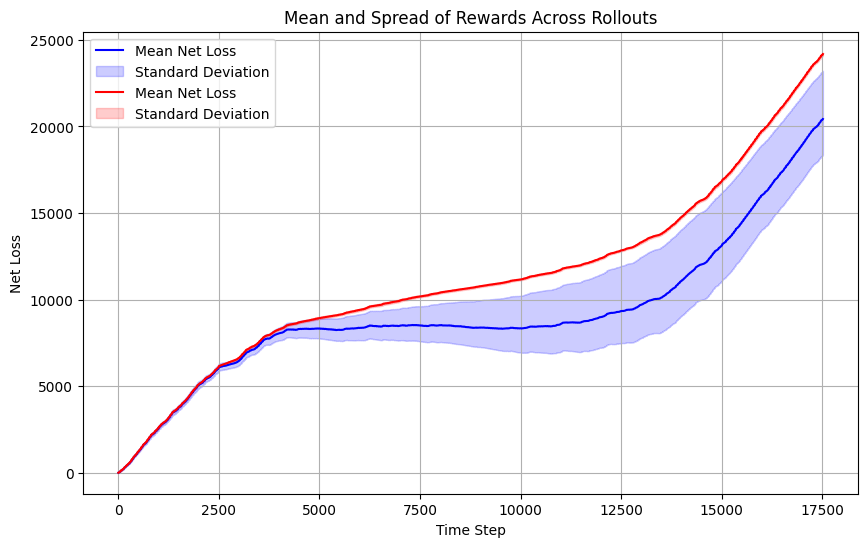

In [1]:
import cloudpickle
import os
import json
import numpy as np
import matplotlib.pyplot as plt

paths = ["output/multi/results_multi.pkl", "output/twolevel/results_twolevel.pkl"]
colors = ["blue", "red"]

plt.figure(figsize=(10, 6))

for results_path, color in zip(paths, colors):
    new_metrics = {}
    messages = []

    # Load the results
    with open(results_path, "rb") as file:
        results = cloudpickle.load(file)

    #Extract rewards from all rollouts (adjust "reward" key if needed)
    all_netloss = np.array([rollout.metrics[f"env/total_loss"] for rollout in results])  # Shape: (num_rollouts, num_steps)

    mean_netloss = np.mean(all_netloss, axis=0)  # Mean across rollouts for each time step
    min_netloss = np.min(all_netloss, axis=0)
    max_netloss = np.max(all_netloss, axis=0)

    time_steps = np.arange(all_netloss.shape[1])  # Assuming all rollouts have the same number of steps

    plt.plot(time_steps, mean_netloss, label="Mean Net Loss", color=color)
    plt.fill_between(
        time_steps,
        min_netloss,
        max_netloss,  # Upper bound
        color=color,
        alpha=0.2,  # Transparency for the shaded area
        label="Standard Deviation"
    )

plt.xlabel("Time Step")
plt.ylabel("Net Loss")
plt.title("Mean and Spread of Rewards Across Rollouts")
plt.legend()
plt.grid()
plt.show()
plt.close()

ValueError: x and y must have same first dimension, but have shapes (17520,) and (10, 17520)

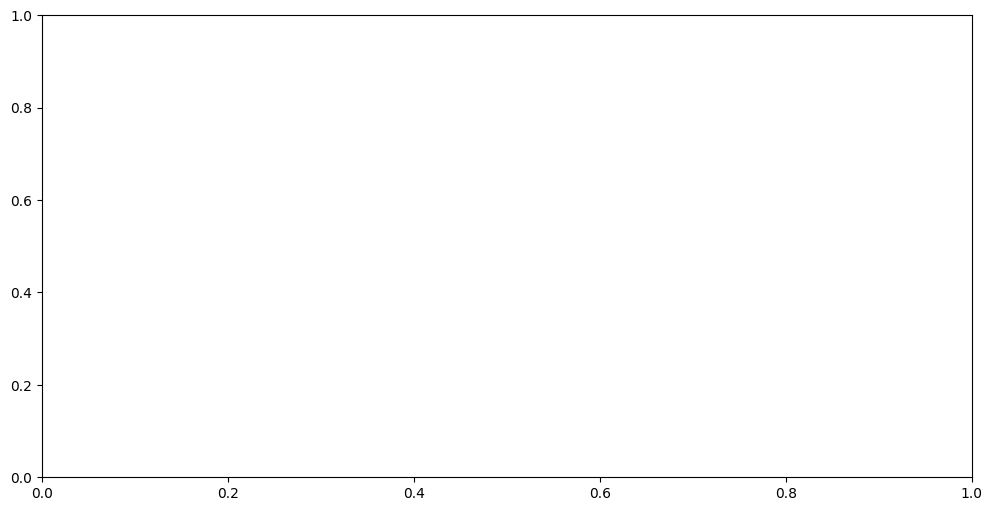

In [ ]:
plt.figure(figsize=(12, 6))
results_path = paths[1]
# Load the results
with open(results_path, "rb") as file:
    results = cloudpickle.load(file)

#Extract rewards from all rollouts (adjust "reward" key if needed)
prices = np.array([rollout.metrics[f"env/current_price"] for rollout in results])  # Shape: (num_rollouts, num_steps)

mean_price = np.min(prices, axis=0)  # Mean across rollouts for each time step
min_price = np.min(prices, axis=0)
max_price = np.max(prices, axis=0)

time_steps = np.arange(prices.shape[1])  # Assuming all rollouts have the same number of steps

plt.plot(time_steps, min_price, label="Mean Net Loss", color="blue")
plt.fill_between(
    time_steps,
    min_price,
    max_price,  # Upper bound
    color="blue",
    alpha=0.2,  # Transparency for the shaded area
    label="Standard Deviation"
)
plt.xlabel("Time Step")
plt.ylabel("Net Loss")
plt.title("Mean and Spread of Rewards Across Rollouts")
plt.legend()
plt.grid()
plt.show()
plt.close()